In [11]:
import random
import matplotlib.pyplot as plt
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

Defining the functions for simulation

In [3]:


def calculate_sides(k):
    sides = [i for i in range(1, k + 1)]
    return sides

def calculate_probabilities(k):
    probabilities = [1 / k for _ in range(k)]
    return probabilities

def simulate_k_sided_die(k):
    outcomes = calculate_sides(k)
    probabilities = calculate_probabilities(k)
    result = random.choices(outcomes, probabilities)[0]
    return result

def simulate_rolls(num_sides, num_rolls):
    simulation = [simulate_k_sided_die(num_sides) for _ in range(num_rolls)]
    return sum(simulation)

def final_simulation(num_sides, num_rolls, num_trials):
    results = [simulate_rolls(num_sides, num_rolls) for _ in range(num_trials)]
    
    minimum = min(results)
    maximum = max(results)
    median = np.median(results)
    q1 = np.percentile(results, 25)
    q3 = np.percentile(results, 75)
    
    print(f"Minimum: {minimum}")
    print(f"Q1: {q1}")
    print(f"Median: {median}")
    print(f"Q3: {q3}")
    print(f"Maximum: {maximum}")

    theoretical_expected_sum = (num_sides + 1) / 2 * num_rolls
    print(f"Theoretical Expected Sum: {theoretical_expected_sum}")

    mean_simulated = np.mean(results)
    print(f"Mean of Simulated Results: {mean_simulated}")

    plt.hist(results, bins=range(minimum, maximum + 1), align='left', rwidth=0.8)
    plt.xlabel(f'Sum of Die Rolls ({num_sides} times)')
    plt.ylabel('Frequency')
    plt.title('Frequency Distribution of Sum of Die Rolls')
    plt.show()

    return


calling the simulations for all the given cases

Minimum: 4
Q1: 8.0
Median: 10.0
Q3: 12.0
Maximum: 16
Theoretical Expected Sum: 10.0
Mean of Simulated Results: 10.016


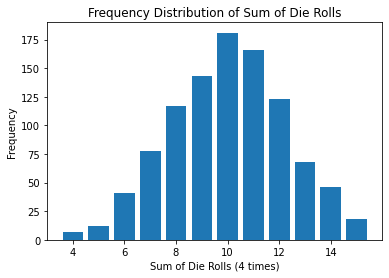

Minimum: 10
Q1: 18.0
Median: 20.0
Q3: 22.0
Maximum: 29
Theoretical Expected Sum: 20.0
Mean of Simulated Results: 20.051


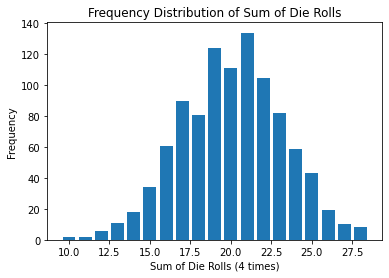

Minimum: 6
Q1: 27.0
Median: 34.0
Q3: 41.0
Maximum: 60
Theoretical Expected Sum: 34.0
Mean of Simulated Results: 33.741


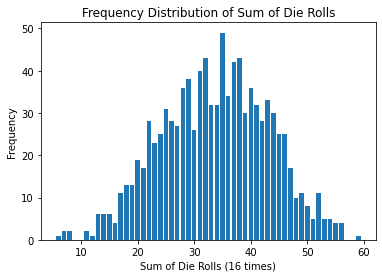

Minimum: 35
Q1: 59.0
Median: 68.0
Q3: 77.0
Maximum: 106
Theoretical Expected Sum: 68.0
Mean of Simulated Results: 68.048


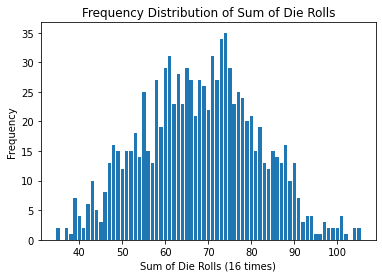

In [4]:
final_simulation(4, 4, 1000)
final_simulation(4, 8, 1000)

final_simulation(16, 4, 1000)
final_simulation(16, 8, 1000)

Fetching the dataset

In [6]:
# fetch dataset
spambase = fetch_ucirepo(id=94)
# data (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets

In [9]:
# metadata
print(spambase.metadata)
# variable information
print(spambase.variables)


# loading as dataframe
X = spambase.data.features
y = spambase.data.targets

{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

Concatenating the features and labels

In [12]:
# combining X and y for now inorder to calculate class variances and means
df = pd.concat([X, y], axis=1)

#check for null values
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

Splitting the dataset

In [19]:
# Split the data into train (70%), validation (15%), and test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(df, y, test_size=0.3, random_state=41)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=41)

# Display the shapes of the resulting sets
print("Training set shapes: X_train =", X_train.shape, "y_train =", y_train.shape)
print("Validation set shapes: X_val =", X_val.shape, "y_val =", y_val.shape)
print("Test set shapes: X_test =", X_test.shape, "y_test =", y_test.shape)


Training set shapes: X_train = (3220, 58) y_train = (3220, 1)
Validation set shapes: X_val = (690, 58) y_val = (690, 1)
Test set shapes: X_test = (691, 58) y_test = (691, 1)


Plotting distribution in data

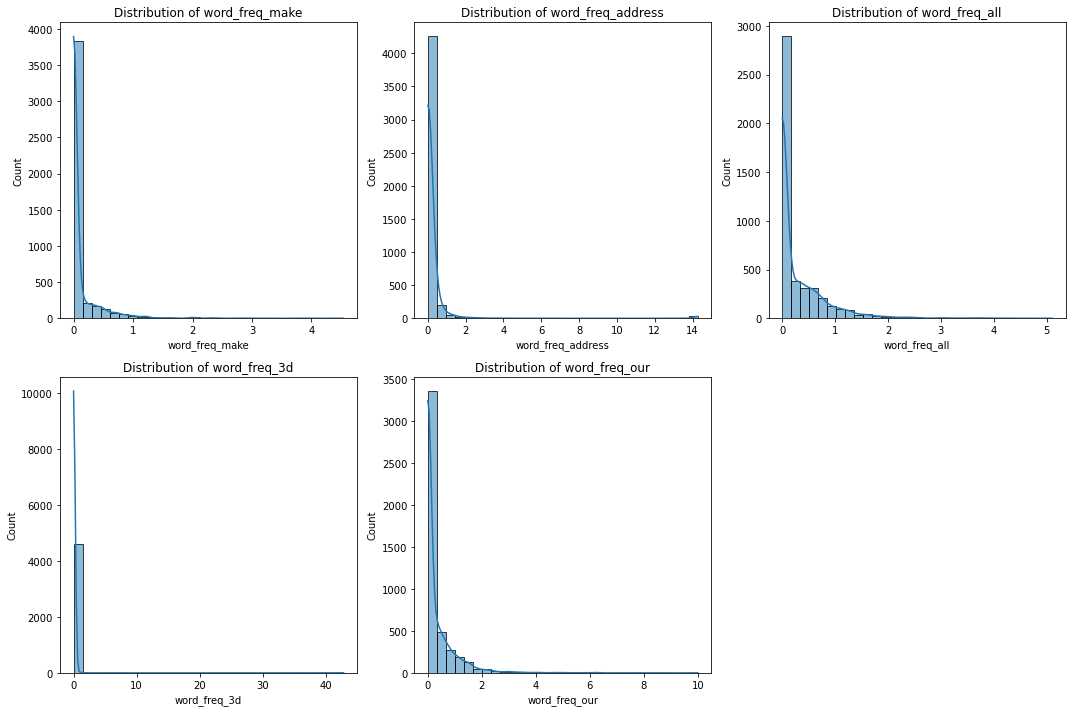

In [20]:
# Selecting the first five columns
selected_columns = X.columns[:5]

# Plot probability distributions for selected columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(X[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

Implementing Naive Bayes from scratch

In [21]:

class GaussianNaiveBayes:
    def fit(self, X_train, y_train):

        # class_means is a new numpy array with 2 rows and 57 columns
        self.class_means = X_train.groupby('Class').mean()

        # class_variances is a new numpy array with 2 rows and 57 columns
        self.class_variances = X_train.groupby('Class').var()

        # prior_y is a new numpy array with 2 elements
        # each element represents the prior probability of a class
        self.prior_y = X_train['Class'].value_counts(normalize=True).sort_index().values
        
    def gaussian(self, x, mean, variance):

        # gaussian function is used to calculate the likelihood of an unseen data point
        # returns the likelihood of x given mean and variance using the gaussian formula
        # these likelihoods are multiplied to the prior probability of the class to get the posterior probability of the class
        # the class with the highest posterior probability is the predicted class

        return (1 / (np.sqrt(2 * np.pi * variance))) * np.exp(-((x - mean) ** 2) / (2 * variance))
    
    def predict(self, X_test):

        # predicted_values is a new list
        predicted_values = []

        # for each row in X_test we calculate the posterior probability of each class and choose the class with the highest probability
        for _, row in X_test.iterrows():

            # posterior_y is a copy of prior_y
            posterior_y = self.prior_y.copy()
            
            # for each class we calculate the posterior probability
            for idx, class_label in enumerate([0, 1]):

                # for each feature in the row we calculate the likelihood of the feature given the class
                for feature_idx, feature_value in enumerate(row[:-1]):

                    # mean and variance are the mean and variance of the feature given the class
                    mean = self.class_means.loc[class_label, X_test.columns[feature_idx]]
                    variance = self.class_variances.loc[class_label, X_test.columns[feature_idx]]

                    # likelihood is the likelihood of the feature given the class calculated using the gaussian function
                    likelihood = self.gaussian(feature_value, mean, variance)

                    # we multiply the likelihood to the prior probability of the class
                    posterior_y[idx] *= likelihood
            
            # we choose the class with the highest posterior probability
            predicted_values.append(np.argmax(posterior_y))
        return np.array(predicted_values)


# function to evaluate the model
def evaluate(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1score = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1score


# create an instance of the model
model = GaussianNaiveBayes()
model.fit(X_train, y_train)
predicted_values = model.predict(X_test)
accuracy, precision, recall, f1score = evaluate(y_test['Class'], predicted_values)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)

    

    

Accuracy: 0.8480463096960926
Precision: 0.7335164835164835
Recall: 0.9709090909090909
F1 Score: 0.8356807511737089


Applying Log Transformation for data

In [22]:
# apply log transformation to the data except the last column (containing labels)

epsilon = 1e-9  # Small constant to avoid zero values
X_train_log = X_train.iloc[:, :-1].apply(lambda x: np.log(x + epsilon))
X_val_log = X_val.iloc[:, :-1].apply(lambda x: np.log(x + epsilon))
X_test_log = X_test.iloc[:, :-1].apply(lambda x: np.log(x + epsilon))


# Add the 'Class' column back to the log-transformed DataFrames 
# This is only done to calculate the class means and variances 
X_train_log['Class'] = X_train['Class']
X_val_log['Class'] = X_val['Class']
X_test_log['Class'] = X_test['Class']

Evaluation on data after log transformation

In [23]:
model = GaussianNaiveBayes()
model.fit(X_train_log, y_train['Class'])

predicted_values_log = model.predict(X_test_log)
accuracy, precision, recall, f1score = evaluate(y_test['Class'], predicted_values_log)

print("Accuracy for the log transformed data:", accuracy)
print("Precision for the log transformed data :", precision)
print("Recall for the log transformed data:", recall)
print("F1 Score for the log transformed data :", f1score)

Accuracy for the log transformed data: 0.918958031837916
Precision for the log transformed data : 0.8520900321543409
Recall for the log transformed data: 0.9636363636363636
F1 Score for the log transformed data : 0.9044368600682595


Implementation of Naive Bayes from Sklearn

In [36]:
# using sklearn's GaussianNB
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes model
nb_model = GaussianNB()

# Train the model (by exluding the last column, containing labels)
nb_model.fit(X_train.iloc[:, :-1], y_train)

# Get predicted values for all samples in X_test
predicted_values = nb_model.predict(X_test.iloc[:, :-1])

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predicted_values)
precision = precision_score(y_test, predicted_values)
recall = recall_score(y_test, predicted_values)
f1score = f1_score(y_test, predicted_values)

print("Accuracy for sklearn model:", accuracy)
print("Precision for sklearn model :", precision)
print("Recall for sklearn model:", recall)
print("F1 Score for sklearn model:", f1score)






Accuracy for sklearn model: 0.8509406657018813
Precision for sklearn model : 0.7375690607734806
Recall for sklearn model: 0.9709090909090909
F1 Score for sklearn model: 0.8383045525902668


/Users/budagamdevichand/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
nb_log_model = GaussianNB()

# Train the  log model (by exluding the last column, containing labels)
nb_log_model.fit(X_train_log.iloc[:, :-1], y_train)

# Get predicted values for all samples in X_test
predicted_values = nb_log_model.predict(X_test_log.iloc[:, :-1])

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predicted_values)
precision = precision_score(y_test, predicted_values)
recall = recall_score(y_test, predicted_values)
f1score = f1_score(y_test, predicted_values)

print("Accuracy for sklearn model with log transformed data:", accuracy)
print("Precision for sklearn model with log transformed data :", precision)
print("Recall for sklearn model with log transformed data:", recall)
print("F1 Score for sklearn model with log transformed data:", f1score)





Accuracy for sklearn model with log transformed data: 0.918958031837916
Precision for sklearn model with log transformed data : 0.8520900321543409
Recall for sklearn model with log transformed data: 0.9636363636363636
F1 Score for sklearn model with log transformed data: 0.9044368600682595


/Users/budagamdevichand/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Plotting the ROC Curves for sklearn naive bayes models

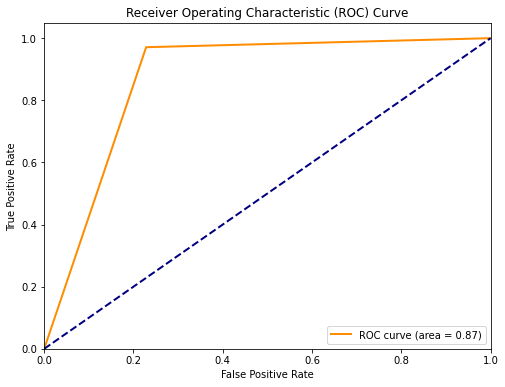

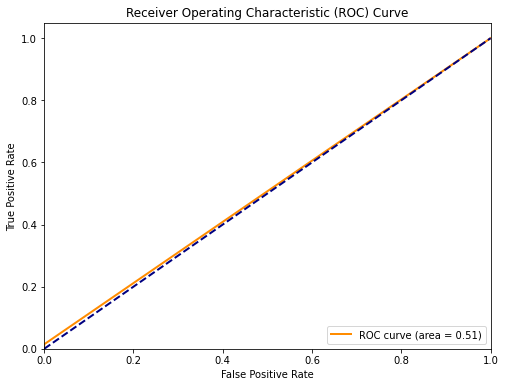

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Generate predicted probabilities for the positive class (class 1)
y_pred_prob = nb_model.predict(X_test.iloc[:,:-1])
y_pred_prob_log = nb_log_model.predict(X_test.iloc[:,:-1])

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)


# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate the ROC curve for log data
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_log)

# Calculate the area under the ROC curve (AUC)
roc_auc_log = auc(fpr, tpr)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_log))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


ROC curve of Naive bayes implemented from scratch shows the best result compared to other Naive bayes model.The accuracy of this model on log-transformed data is 0.918958031837916.The accuracy of SVM is 0.932682 obtained with rbf kernel.